# Gender Recognition by Voice Using Numerical Algorithms

## Importing Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(font_scale=1.5)

data = pd.read_csv('data/cleaned/voice_data.csv')
X_train = pd.read_csv('data/cleaned/X_train.csv')
y_train = pd.read_csv('data/cleaned/y_train.csv')
X_test = pd.read_csv('data/cleaned/X_test.csv')
y_test = pd.read_csv('data/cleaned/y_test.csv')

In [2]:
data.head()

,meanfreq,median,Q25,Q75,IQR,sd,log_skew,log_kurt,sp.ent,sfm,mode,meanfun,log_minfun,exp_maxfun,modindx,meandom,mindom,maxdom,dfrange,label
0,-4.049248,-4.224901,-2.576102,-5.693607,-0.214778,0.427355,2.925892,3.177486,-0.039083,0.471575,-2.141210,-1.812038,-1.384486,0.636793,-1.454772,-1.564205,-0.708404,-1.431422,-1.419137,male
1,-3.841053,-3.999293,-2.486885,-5.588987,-0.258485,0.611669,4.032721,4.022523,-0.065236,0.594431,-2.141210,-1.079594,-1.369352,-0.524133,-1.014103,-1.561916,-0.708404,-1.418107,-1.405818,male
2,-3.463066,-4.095851,-2.706986,-3.928699,0.909326,1.603848,4.675089,4.506253,-1.083730,0.398261,-2.141210,-1.365368,-1.390131,0.404082,-1.065344,-1.563866,-0.708404,-1.429203,-1.416917,male
3,-0.992157,-0.759454,-0.901418,-0.711205,0.632690,0.899998,-0.927599,-0.837709,1.516383,1.797340,-1.054576,-1.666966,-1.143909,-0.524133,0.614286,-1.195367,-0.708404,-1.273867,-1.261532,male
4,-1.530640,-1.676948,-1.268395,-0.792029,1.005588,1.322561,-1.055855,-0.807635,1.708336,2.114740,-0.790514,-1.127233,-1.239725,0.189238,0.289046,-0.221660,-0.708404,0.124154,0.136933,male


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meanfreq    3168 non-null   float64
 1   median      3168 non-null   float64
 2   Q25         3168 non-null   float64
 3   Q75         3168 non-null   float64
 4   IQR         3168 non-null   float64
 5   sd          3168 non-null   float64
 6   log_skew    3168 non-null   float64
 7   log_kurt    3168 non-null   float64
 8   sp.ent      3168 non-null   float64
 9   sfm         3168 non-null   float64
 10  mode        3168 non-null   float64
 11  meanfun     3168 non-null   float64
 12  log_minfun  3168 non-null   float64
 13  exp_maxfun  3168 non-null   float64
 14  modindx     3168 non-null   float64
 15  meandom     3168 non-null   float64
 16  mindom      3168 non-null   float64
 17  maxdom      3168 non-null   float64
 18  dfrange     3168 non-null   float64
 19  label       3168 non-null  

The meaning of the features are as follows:

* `meanfreq`: mean frequency (in kHz)
* `median`: median frequency (in kHz)
* `Q25`: first quantile (in kHz)
* `Q75`: third quantile (in kHz)
* `IQR`: inter-quantile range (in kHz)
* `sd`: standard deviation of frequency
* `log_skew`: skewness after logarithmic transformation
* `log_kurt`: kurtosis after logarithmic transformation
* `sp.ent`: spectral entropy
* `sfm`: spectral flatness
* `mode`: mode frequency
* `log_meanfun`: average of fundamental frequency measured across acoustic signal
* `log_minfun`: minimum fundamental frequency measured across acoustic signal after logarithmic transformation
* `exp_maxfun`: maximum fundamental frequency measured across acoustic signal after exponential transformation
* `modindx`: modulation index
* `meandom`: average of dominant frequency measured across acoustic signal
* `mindom`: minimum of dominant frequency measured across acoustic signal
* `maxdom`: maximum of dominant frequency measured across acoustic signal
* `dfrange`: range of dominant frequency measured across acoustic signal
* `label`: male or female

## Extracting Important Features

In order to explore more models, we will firstly use the two most important features only. Which makes the model simpler and easier to interpret.

In [4]:
X_train_important = X_train[["meanfun", "IQR"]]
X_test_important = X_test[["meanfun", "IQR"]]

## Logistic Regression

In logistic regression, we try to use regression to predict the probability of the label, which is $p(y=\mathtt{male}\mid X=X_i)$.

The general form of logistic regression is as follows:
$$
\begin{align}
\hat{p}(y=k\mid X=x) &= \frac{e^{\beta_{k0}+\beta_{k}^T x}}{1+\sum_{l=1}^{K-1} e^{\beta_{l0}+\beta_{l}^T x}} , &k=1,\cdots,K-1\\
\hat{p}(y=K\mid X=x) &= \frac{1}{1+\sum_{l=1}^{K-1} e^{\beta_{l0}+\beta_{l}^T x}}
\end{align}
$$

Since we only have two classes, we can simplify the model to:
$$
\hat{p}(y=\mathtt{male}\mid X=x) = \frac{e^{\beta_0+\beta^T x}}{1+e^{\beta_0+\beta^T x}}=\frac{1}{1+e^{-(\beta_0+\sum_{i=1}^n \beta_i x_i)}}
$$

Firstly, for ease of interpretation, we will use only one feature, which is `meanfun`.

beta_0: -0.26
beta_1: -5.54
Training set accuracy: 0.96
Test set accuracy: 0.95
True Positive Rate: 0.95
True Negative Rate: 0.95
False Positive Rate: 0.05
False Negative Rate: 0.05
Training set accuracy: 0.96
Test set accuracy: 0.95


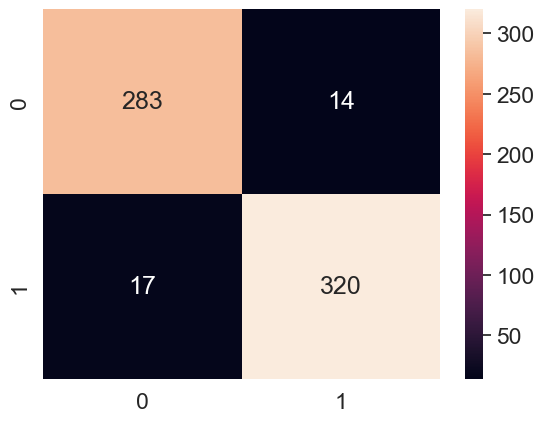

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=87).fit(X_train_important[["meanfun"]], y_train.squeeze())
print("beta_0: {:.2f}".format(logreg.intercept_[0]))
print("beta_1: {:.2f}".format(logreg.coef_[0][0]))
print("Training set accuracy: {:.2f}".format(logreg.score(X_train_important[["meanfun"]], y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(logreg.score(X_test_important[["meanfun"]], y_test)))
sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test_important[["meanfun"]])), annot=True, fmt="d")

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test_important[["meanfun"]])).ravel()
TPR_logreg_1 = TP / (TP + FN)
TNR_logreg_1 = TN / (TN + FP)
FPR_logreg_1 = FP / (FP + TN)
FNR_logreg_1 = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_logreg_1))
print("True Negative Rate: {:.2f}".format(TNR_logreg_1))
print("False Positive Rate: {:.2f}".format(FPR_logreg_1))
print("False Negative Rate: {:.2f}".format(FNR_logreg_1))

logreg_1_train_accuracy = logreg.score(X_train_important[["meanfun"]], y_train.squeeze())
logreg_1_test_accuracy = logreg.score(X_test_important[["meanfun"]], y_test.squeeze())

print("Training set accuracy: {:.2f}".format(logreg_1_train_accuracy))
print("Test set accuracy: {:.2f}".format(logreg_1_test_accuracy))

We try to plot the regression line of the model.

<Axes: xlabel='meanfun', ylabel='label'>

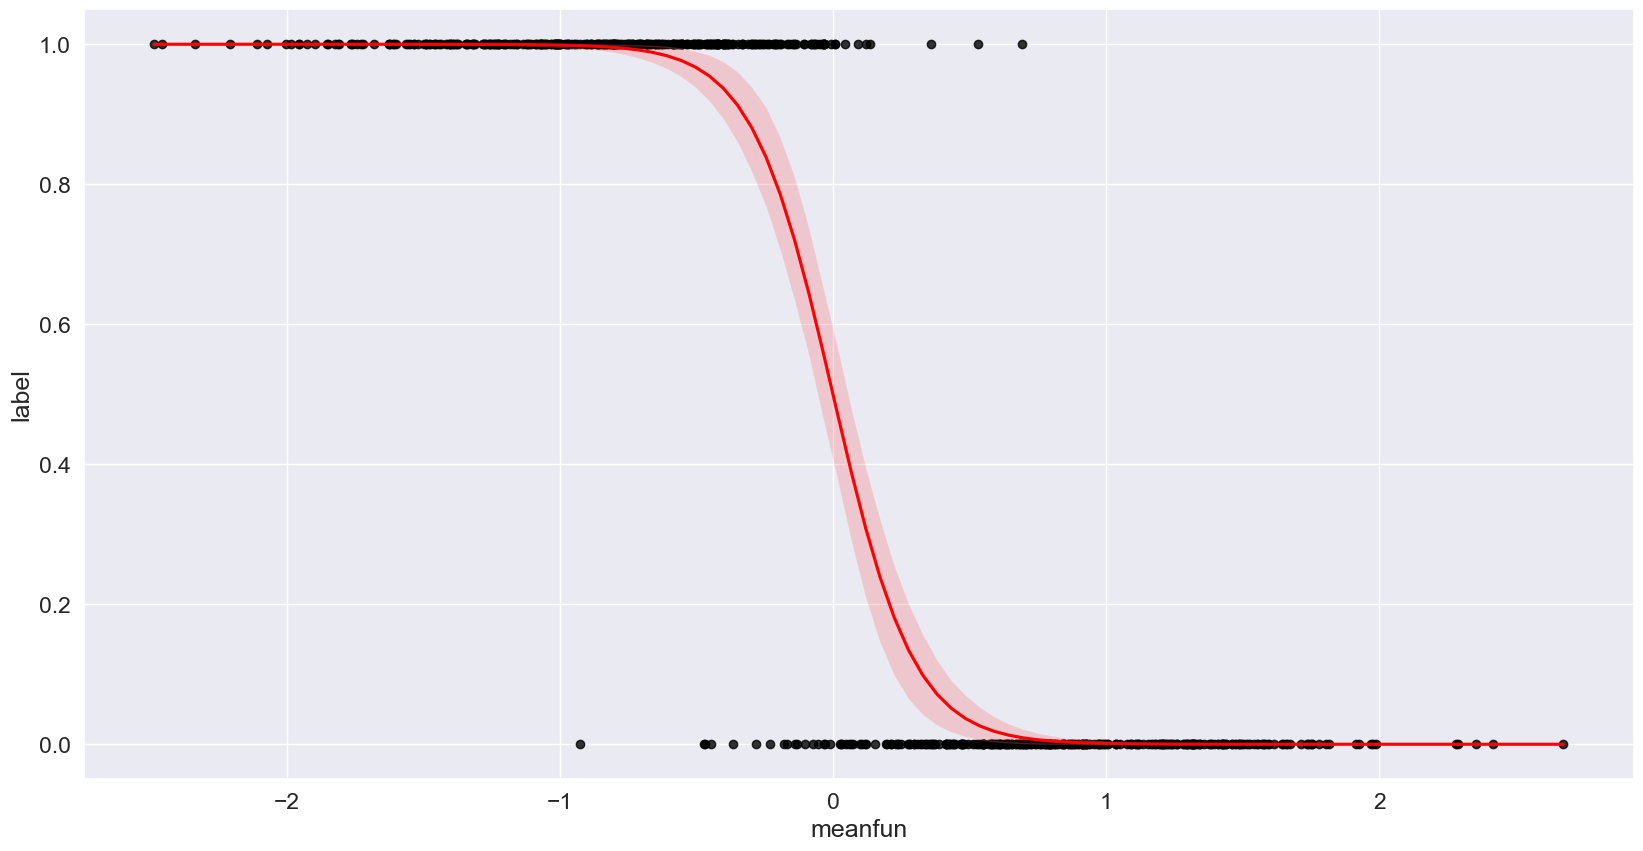

In [6]:
x_plot = X_test_important[["meanfun"]]
y_plot = y_test["label"] == "male"
plt.figure(figsize=(20, 10))
sns.regplot(x=x_plot, y=y_plot, logistic=True, scatter_kws={"color": "black"}, line_kws={"color": "red"})

We try to use the two most important features.

beta_0: -0.42
beta_1: -4.98
beta_2: 1.43
Training set accuracy: 0.96
Test set accuracy: 0.98
True Positive Rate: 0.98
True Negative Rate: 0.97
False Positive Rate: 0.03
False Negative Rate: 0.02


<Axes: >

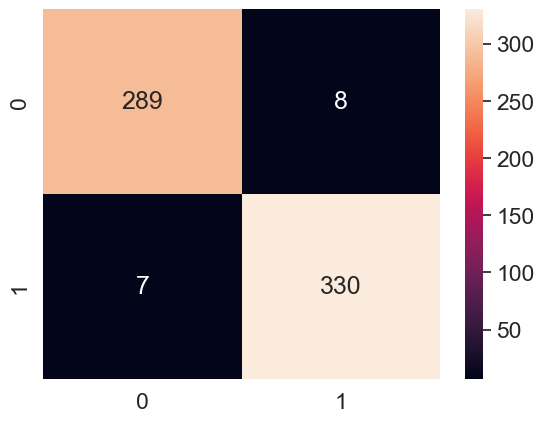

In [7]:
logreg = LogisticRegression(random_state=87).fit(X_train_important, y_train.squeeze())
print("beta_0: {:.2f}".format(logreg.intercept_[0]))
print("beta_1: {:.2f}".format(logreg.coef_[0][0]))
print("beta_2: {:.2f}".format(logreg.coef_[0][1]))
print("Training set accuracy: {:.2f}".format(logreg.score(X_train_important, y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(logreg.score(X_test_important, y_test)))

logreg_2_train_accuracy = logreg.score(X_train_important, y_train.squeeze())
logreg_2_test_accuracy = logreg.score(X_test_important, y_test.squeeze())

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test_important)).ravel()
TPR_logreg_2 = TP / (TP + FN)
TNR_logreg_2 = TN / (TN + FP)
FPR_logreg_2 = FP / (FP + TN)
FNR_logreg_2 = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_logreg_2))
print("True Negative Rate: {:.2f}".format(TNR_logreg_2))
print("False Positive Rate: {:.2f}".format(FPR_logreg_2))
print("False Negative Rate: {:.2f}".format(FNR_logreg_2))

sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test_important)), annot=True, fmt="d")

We try to plot the probability of the label for the model.

C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='meanfun', ylabel='IQR'>

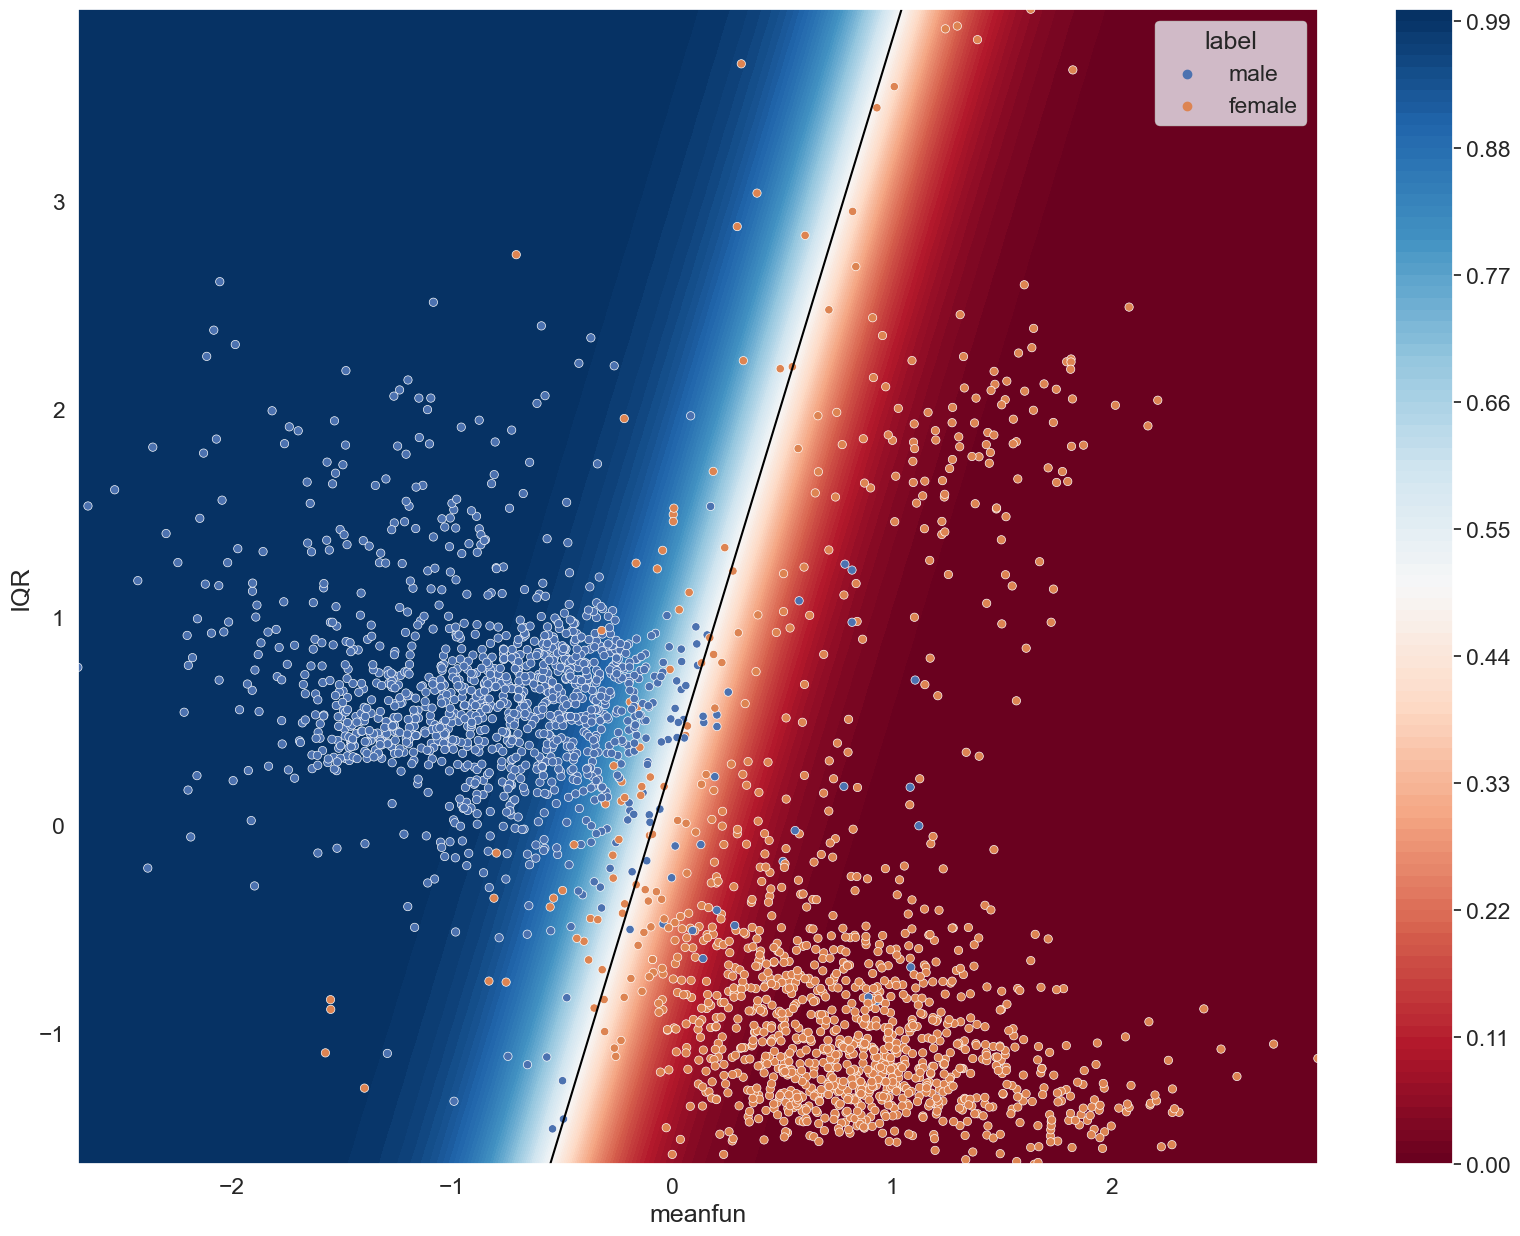

In [8]:
plt.figure(figsize=(20, 15))
x_plot = np.linspace(X_train_important["meanfun"].min(), X_train_important["meanfun"].max(), 100)
y_plot = np.linspace(X_train_important["IQR"].min(), X_train_important["IQR"].max(), 100)
X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
Z_plot = logreg.predict_proba(pd.DataFrame(np.array([X_plot.ravel(), Y_plot.ravel()]).T))[:, 1].reshape(X_plot.shape)
plt.contour(X_plot, Y_plot, Z_plot, levels=[0.5], colors="black")
plt.contourf(X_plot, Y_plot, Z_plot, levels=100, cmap="RdBu", vmin=0, vmax=1)
plt.colorbar()
sns.scatterplot(X_train_important, x="meanfun", y="IQR", hue=y_train["label"], sizes=(20, 200))

Then we try to use all the features.

In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=87, max_iter=1000).fit(X_train, y_train.squeeze())
print("beta_0: {:.2f}".format(logreg.intercept_[0]))
for i, beta in enumerate(logreg.coef_[0]):
    print("beta_{}: {:.2f}".format(i + 1, beta))

beta_0: -0.93
beta_1: -0.22
beta_2: -0.12
beta_3: -0.68
beta_4: 0.58
beta_5: 1.10
beta_6: 0.38
beta_7: 0.51
beta_8: -0.90
beta_9: 1.40
beta_10: -1.51
beta_11: 0.14
beta_12: -4.82
beta_13: 0.73
beta_14: 0.05
beta_15: -0.23
beta_16: -0.07
beta_17: 0.02
beta_18: -0.04
beta_19: -0.04


Training set accuracy: 0.97
Test set accuracy: 0.98
True Positive Rate: 0.97
True Negative Rate: 0.98
False Positive Rate: 0.02
False Negative Rate: 0.03


<Axes: >

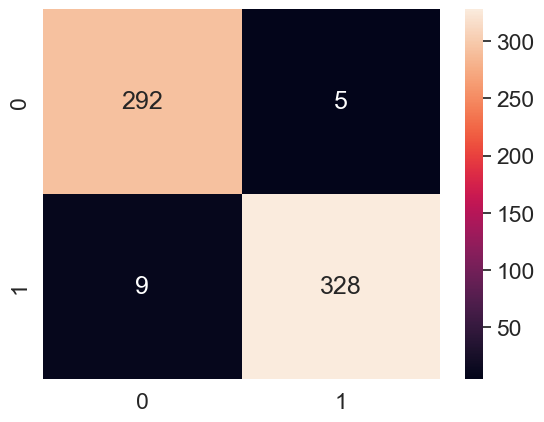

In [10]:
logreg_3_train_accuracy = logreg.score(X_train, y_train)
logreg_3_test_accuracy = logreg.score(X_test, y_test)

print("Training set accuracy: {:.2f}".format(logreg.score(X_train, y_train.squeeze())))
print("Test set accuracy: {:.2f}".format(logreg.score(X_test, y_test.squeeze())))

TN, FP, FN, TP = confusion_matrix(y_test, logreg.predict(X_test)).ravel()
TPR_logreg_3 = TP / (TP + FN)
TNR_logreg_3 = TN / (TN + FP)
FPR_logreg_3 = FP / (FP + TN)
FNR_logreg_3 = FN / (FN + TP)

print("True Positive Rate: {:.2f}".format(TPR_logreg_3))
print("True Negative Rate: {:.2f}".format(TNR_logreg_3))
print("False Positive Rate: {:.2f}".format(FPR_logreg_3))
print("False Negative Rate: {:.2f}".format(FNR_logreg_3))

sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test)), annot=True, fmt="d")

We try to summarize the performance of the logistic regression model.

In [50]:
results = pd.DataFrame(
    {
        "Model": ["Logistic Regression with 1 feature",
                  "Logistic Regression with 2 features",
                  "Logistic Regression with all features"],
        "Training Accuracy": [logreg_1_train_accuracy,
                              logreg_2_train_accuracy,
                              logreg_3_train_accuracy],
        "Test Accuracy": [logreg_1_test_accuracy,
                          logreg_2_test_accuracy,
                          logreg_3_test_accuracy],
    }
)
results

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression with 1 feature,0.955012,0.951104
1,Logistic Regression with 2 features,0.963694,0.976341
2,Logistic Regression with all features,0.973954,0.977918


<Axes: xlabel='Feature Used'>

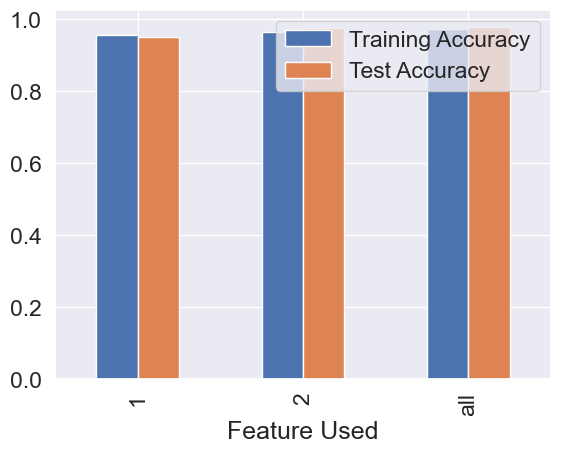

In [67]:

# Create a bar plot
ax = results.plot(x="Model", y=["Training Accuracy", "Test Accuracy"], kind="bar")
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy of Logistic Regression Models with Different Features")

# Add numerical values as annotations to the bar plot
for i, col in enumerate(["Training Accuracy", "Test Accuracy"]):
    for j, val in enumerate(results[col]):
        ax.annotate(f"{val:.2f}", (j + i * 0.15 - 0.15, val), ha='center', va='bottom')

# Show the plot
plt.show()

## K-Nearest Neighbors

In [187]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train.squeeze())

In [188]:
knn.score(X_train, y_train)

1.0

In [189]:
knn.score(X_test, y_test)

0.9716088328075709

In [190]:
y_prediction = knn.predict(X_test)

<Axes: >

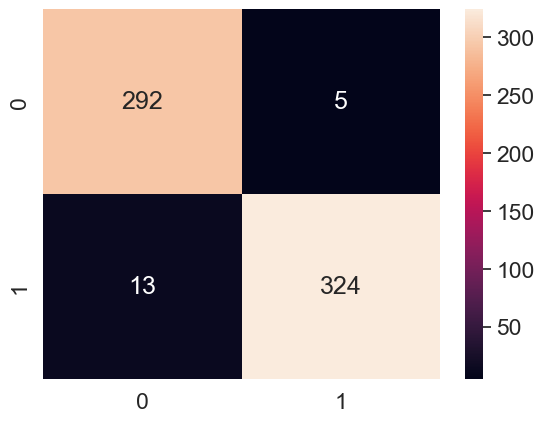

In [191]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [192]:
knn2 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train.squeeze())

In [193]:
knn2.score(X_train, y_train)

0.984214680347277

In [194]:
knn2.score(X_test, y_test)

0.9794952681388013

In [195]:
y_prediction = knn2.predict(X_test)

<Axes: >

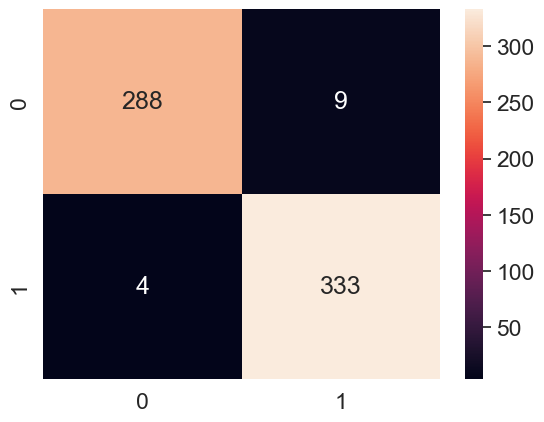

In [196]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

## Support Vector Machines

Support vector machines are a powerful and flexible class of supervised algorithms for both classification and regression. They are particularly well suited for classification of complex but small- or medium-sized datasets.

We try to use it in our dataset.

The main idea of SVM is to find a hyperplane that can separate the data. The hyperplane is the decision boundary that separates the data into different classes. The goal is to find the hyperplane that has the largest distance to the nearest data points of any class. This is called the maximum margin hyperplane.

### SVM with All Features

Now we will use all features to train the SVM model.

In [23]:
def train_with_all_features(kernel):
    svm = SVC(random_state=87, kernel=kernel).fit(X_train, y_train.squeeze())

    train_accuracy = svm.score(X_train, y_train)
    test_accuracy = svm.score(X_test, y_test)

    print("Training set accuracy: {:.6f}".format(train_accuracy))
    print("Test set accuracy: {:.6f}".format(test_accuracy))
    sns.heatmap(confusion_matrix(y_test, svm.predict(X_test)), annot=True, fmt="d")

    TN, FP, FN, TP = confusion_matrix(y_test, svm.predict(X_test)).ravel()
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)

    return train_accuracy, test_accuracy, TPR, TNR, FPR, FNR

#### Linear Kernel

Training set accuracy: 0.977901
Test set accuracy: 0.976341


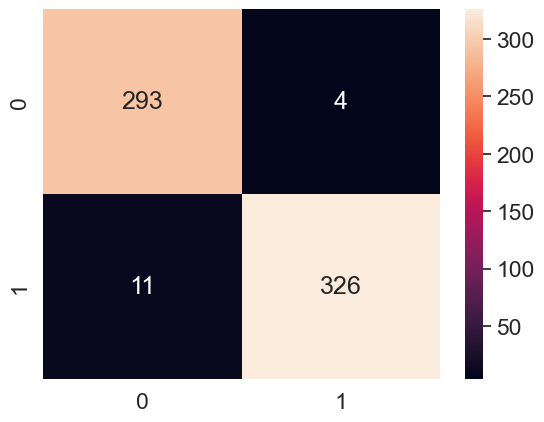

In [24]:
train_accuracy_svm_all_linear, test_accuracy_svm_all_linear, TPR_svm_all_linear, TNR_svm_all_linear, FPR_svm_all_linear, FNR_svm_all_linear = train_with_all_features(
    "linear")

#### Polynomial Kernel

Training set accuracy: 0.977506
Test set accuracy: 0.976341


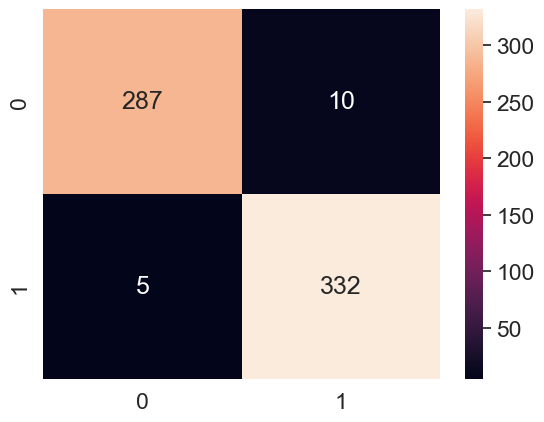

In [25]:
train_accuracy_svm_all_poly, test_accuracy_svm_all_poly, TPR_svm_all_poly, TNR_svm_all_poly, FPR_svm_all_poly, FNR_svm_all_poly = train_with_all_features(
    "poly")

#### Gaussian Kernel

Training set accuracy: 0.986188
Test set accuracy: 0.982650


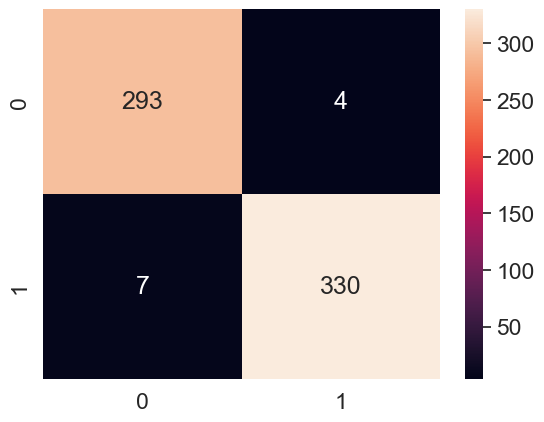

In [26]:
train_accuracy_svm_all_gaussian, test_accuracy_svm_all_gaussian, TPR_svm_all_gaussian, TNR_svm_all_gaussian, FPR_svm_all_gaussian, FNR_svm_all_gaussian = train_with_all_features(
    "rbf")

#### Sigmoid Kernel

Training set accuracy: 0.803078
Test set accuracy: 0.820189


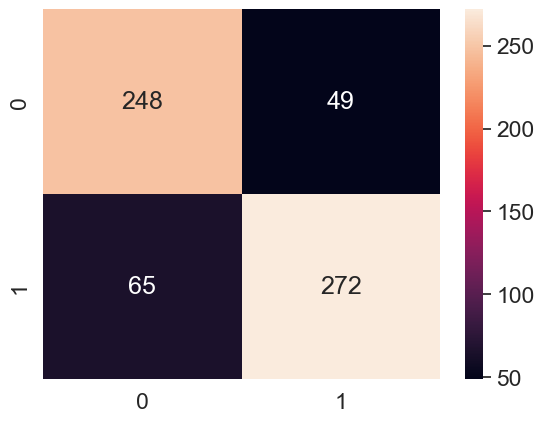

In [27]:
train_accuracy_svm_all_sigmoid, test_accuracy_svm_all_sigmoid, TPR_svm_all_sigmoid, TNR_svm_all_sigmoid, FPR_svm_all_sigmoid, FNR_svm_all_sigmoid = train_with_all_features(
    "sigmoid")

#### Comparison

Here are the comparison of the results of the different kernels:

In [28]:
results = pd.DataFrame(
    {
        "Kernel": ["Linear", "Polynomial", "Gaussian", "Sigmoid"],
        "Training Accuracy": [
            train_accuracy_svm_all_linear,
            train_accuracy_svm_all_poly,
            train_accuracy_svm_all_gaussian,
            train_accuracy_svm_all_sigmoid,
        ],
        "Test Accuracy": [
            test_accuracy_svm_all_linear,
            test_accuracy_svm_all_poly,
            test_accuracy_svm_all_gaussian,
            test_accuracy_svm_all_sigmoid,
        ],
        "True Positive Rate": [
            TPR_svm_all_linear,
            TPR_svm_all_poly,
            TPR_svm_all_gaussian,
            TPR_svm_all_sigmoid,
        ],
        "True Negative Rate": [
            TNR_svm_all_linear,
            TNR_svm_all_poly,
            TNR_svm_all_gaussian,
            TNR_svm_all_sigmoid,
        ],
        "False Positive Rate": [
            FPR_svm_all_linear,
            FPR_svm_all_poly,
            FPR_svm_all_gaussian,
            FPR_svm_all_sigmoid,
        ],
        "False Negative Rate": [
            FNR_svm_all_linear,
            FNR_svm_all_poly,
            FNR_svm_all_gaussian,
            FNR_svm_all_sigmoid,
        ],
    }
)
results

,Kernel,Training Accuracy,Test Accuracy,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate
0,Linear,0.977901,0.976341,0.967359,0.986532,0.013468,0.032641
1,Polynomial,0.977506,0.976341,0.985163,0.966330,0.033670,0.014837
2,Gaussian,0.986188,0.982650,0.979228,0.986532,0.013468,0.020772
3,Sigmoid,0.803078,0.820189,0.807122,0.835017,0.164983,0.192878


## Neural Network

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=87, max_iter=1000).fit(X_train, y_train.squeeze())

In [30]:
mlp.score(X_train, y_train)

1.0

In [31]:
mlp.score(X_test, y_test)

0.9826498422712934

In [32]:
y_prediction = mlp.predict(X_test)

<Axes: >

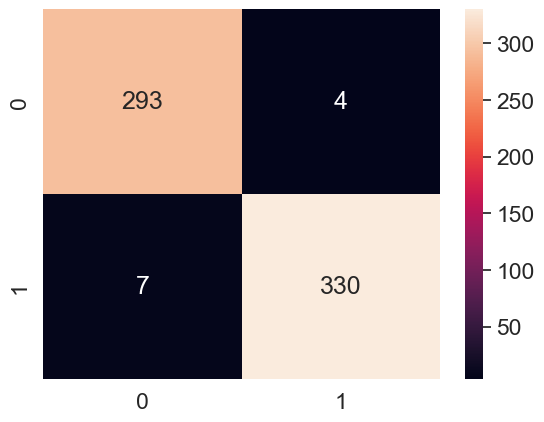

In [33]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [34]:
mlp2 = MLPClassifier(random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100)).fit(X_train, y_train.squeeze())

In [35]:
mlp2.score(X_train, y_train)

1.0

In [36]:
mlp2.score(X_test, y_test)

0.9810725552050473

In [37]:
y_prediction = mlp2.predict(X_test)

<Axes: >

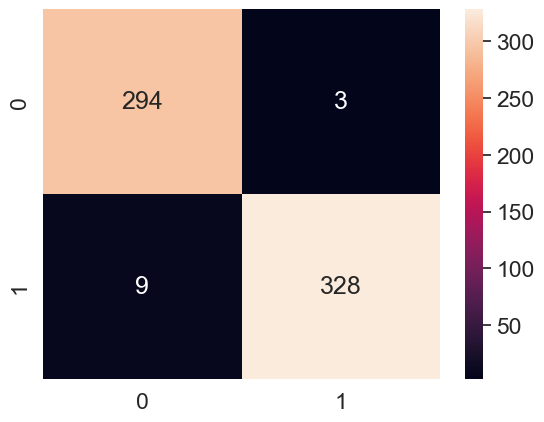

In [38]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [39]:
mlp3 = MLPClassifier(random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100, 100)).fit(X_train, y_train.squeeze())

In [40]:
mlp3.score(X_train, y_train)

1.0

In [41]:
mlp3.score(X_test, y_test)

0.9794952681388013

In [42]:
y_prediction = mlp3.predict(X_test)

<Axes: >

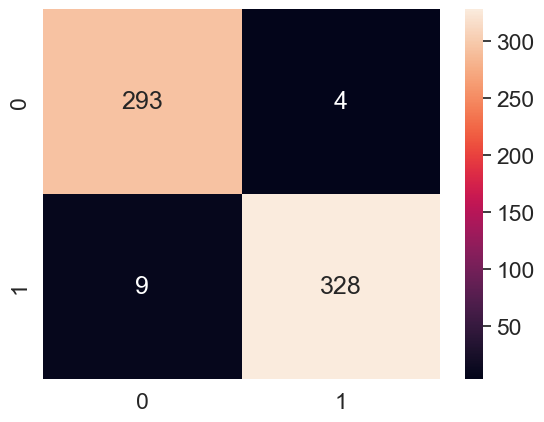

In [43]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [44]:
mlp4 = MLPClassifier(random_state=87, max_iter=1000, hidden_layer_sizes=(100, 100, 100, 100)).fit(X_train,
                                                                                                  y_train.squeeze())

In [45]:
mlp4.score(X_train, y_train)

1.0

In [46]:
mlp4.score(X_test, y_test)

0.9810725552050473

In [47]:
y_prediction = mlp4.predict(X_test)

<Axes: >

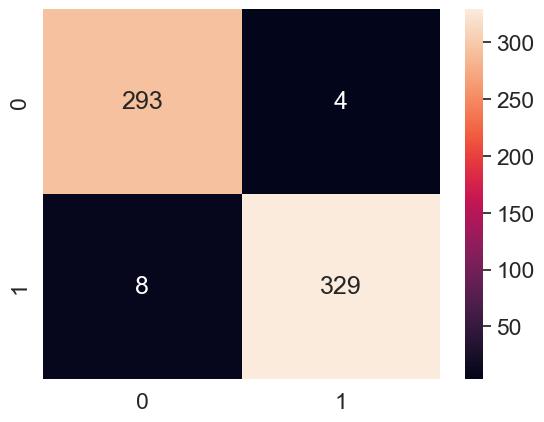

In [48]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")